In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.corpus import wordnet

In [2]:
df = pd.read_csv('../data/Cleaned_Job_desc_data',index_col=0)
df.head()
df.tail()
#Disparity / Class Balance Check
df['job_title'].value_counts()


financial+analyst    342
physician            261
recruiter            209
underwriter          192
chemical+engineer    180
data+scientist       170
Name: job_title, dtype: int64

<Figure size 576x432 with 0 Axes>

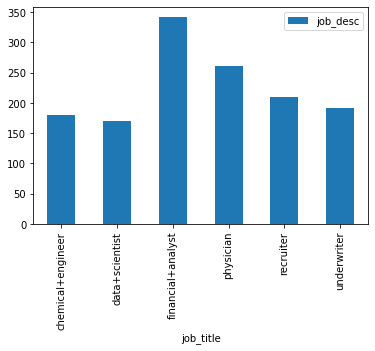

In [3]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('job_title').count().plot.bar(ylim=0)
plt.show()

In [5]:
df["job_id"] = df["job_title"].factorize()[0]
job_id_df = df[['job_id', 'job_title']].drop_duplicates().sort_values('job_id')
id_to_job = dict(job_id_df[['job_id', 'job_title']].values)
# Setting targets and training data
features = df['job_desc'].values
targets = df['job_id']

In [6]:
ows = list(map(lambda row: extract_bow_from_raw_text(features), docs))

NameError: name 'docs' is not defined

In [342]:
from collections import Counter

# term occurence = counting distinct words in each bag
term_occ = list(map(lambda bow : Counter(bow), bows))

# term frequency = occurences over length of bag
term_freq = list()
for i in range(len(docs)):
    term_freq.append( {k: (v / float(len(bows[i])))
                       for k, v in term_occ[i].items()} )

# displaying occurences
for i in range(len(docs)):
    print("\n--- review: {}".format(docs[i]['reviewText']))
    print("--- bow: {}".format(bows[i]))
    print("--- term_occ: {}".format(term_occ[i]))
    print("--- term_freq: {}".format(term_freq[i]))

,job_id,job_title
0,0,underwriter
622,1,chemical+engineer
0,2,physician
223,3,recruiter
834,4,financial+analyst
348,5,data+scientist


In [329]:
def remove_stopwords(stopWoFinancrds, descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            if word not in stopWords:
                temp_list.append(word.lower())
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

def remove_punctuation(descriptions):
    no_punct_descriptions = []
    for description in descriptions:
        description_no_punct = ' '.join(RegexpTokenizer(r'\w+').tokenize(description))
        no_punct_descriptions.append(description_no_punct)
    return np.array(no_punct_descriptions)

def get_wordnet_pos(word):
    # nltk.download()

    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {'J': wordnet.ADJ,
               'N': wordnet.NOUN,
               'V': wordnet.VERB,
               'R': wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

def lemmatize_descriptions(descriptions):
    cleaned_descriptions = []
    for description in descriptions:
        temp_list = []
        for word in description.split():
            cleaned_word = WordNetLemmatizer().lemmatize(word, get_wordnet_pos(word))
            temp_list.append(cleaned_word)
        cleaned_descriptions.append(' '.join(temp_list))
    return np.array(cleaned_descriptions)

def clean_descriptions(stopWords, descriptions):
    no_punct = remove_punctuation(descriptions)
    no_punct_sw = remove_stopwords(stopWords, no_punct)
    cleaned = lemmatize_descriptions(no_punct_sw)
    return cleaned

def get_representative_jobs(df, kmeans):
    cluster_centers = kmeans.cluster_centers_
    for cent in cluster_centers:
        print('\nCluster Represnetations')
        dist = euclidean_distances(cent.reshape(1,-1), tfidf)
        order = np.argsort(dist)
        for o in order[0][:5]:
            title = df['job_title'].iloc[o]
            print(title)

In [372]:


if __name__ == '__main__':
    import os
    print("curr path is:")
    print(os.getcwd())
    
    
    # Setting targets and training data
    descriptions = df['job_desc'].values
    targets = df['job_id']
    
    
    # Creating stop words
    stopWords = set(stopwords.words('english'))
    add_stopwords = {
        'join', 'work', 'team', 'future', 'digital', 'technology', 'access', 'leader', 'industry', 'history', 'innovation',
        'year', 'customer', 'focused', 'leading', 'business', 'ability', 'country', 'employee', 'www', 'seeking',
        'location', 'role', 'responsible', 'designing', 'code', 'ideal', 'candidate', 'also', 'duty', 'without', 'excellent',
        'set', 'area', 'well', 'use', 'strong', 'self', 'help', 'diverse', 'every', 'day', 'equal', 'employment', 'opportunity',
        'affirmative', 'action', 'employer', 'diversity', 'qualified', 'applicant', 'receive', 'consideration', 'regard',
        'race', 'color', 'religion', 'sex', 'national', 'origin', 'status', 'age', 'sexual', 'orientation', 'gender',
        'identity', 'disability', 'marital', 'family', 'medical', 'protected', 'veteran', 'reasonable', 'accomodation',
        'protect', 'status', 'equal', 'discriminate', 'inclusive', 'diverse','benefits','vacation','000'
    }
    
    stopWords = stopWords.union(add_stopwords)

    # Initializing punctuation remover and lemmatizer
    tokenize_remove_punct = RegexpTokenizer(r'\w+')
    lemma = WordNetLemmatizer()

    # Cleaning descriptions for both the whole dataset and CO only
    cleaned_descriptions = clean_descriptions(stopWords, descriptions)
    

    # Vectorizing words creating both tf and tf-idf matrices
    tfidf_vectorizer = TfidfVectorizer(stop_words=stopWords, min_df=.05, max_df=0.75, max_features=5000,ngram_range=(1, 2))
    
    features = tfidf_vectorizer.fit_transform(cleaned_descriptions).toarray()
    
    
    # Term frequency is how often it appears IN the document
    
    # Inverse frequency is how often it appears across all documents
    
    

curr path is:
/home/aqeelali7/Documents/Galvanize/Capstone-3-ATS/The-Right-Resume/src


In [415]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer(stop_words=stopWords, min_df=.10, max_df=0.75, max_features=5000,ngram_range=(1, 2))

features = count_vect.fit_transform(cleaned_descriptions).toarray()
    

In [482]:
bfindings = []
for i in cleaned_descriptions:
    if i.find('financial analyst') != -1:
        bfindings.append(True)
    else: 
        bfindings.append(False)
len(bfindings)
len(cleaned_descriptions)
# bfindings.value_counts()
bfindings.count(True)

197

In [416]:
features.shape

(1354, 540)

In [473]:
# bigram_dups = df.loc[df['job_desc'].str.contains("data scientist", case=False)]
# boolean_findings = df['job_desc'].str.contains('financial analyst')
# boolean_findings = 'financial analyst' in cleaned_descriptions
# boolean_findings = np.any(cleaned_descriptions == "financial analyst")
# boolean_findings = cleaned_descriptions.__contains__("financial analyst")
# boolean_findings

False

In [471]:
type(boolean_findings)

bool

In [493]:
df_w_fa = df[(bfindings)&(df["job_title"]!="financial+analyst")]
df_w_fa['job_desc'][134]
df_w_fa

,job_title,job_desc
134,underwriter,Elevate your career options. Merchants Bonding...
396,underwriter,Be Here. Be Great. Working for a leader in the...
105,data+scientist,The Model Validation Manager will oversee and ...


In [501]:
from sklearn.feature_selection import chi2

import numpy as np

N = 5

for job,ids in sorted(job_to_id.items()):
    features_chi2 = chi2(features, targets==ids)
    
    indices = np.argsort(features_chi2[0])
    
    feature_names = np.array(count_vect.get_feature_names())[indices]

    unigrams = [v for v in feature_names if len(v.split(' ')) == 1]

    bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
    
    print("# '{}':".format(job))
    print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
    print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))
    


# 'chemical+engineer':
  . Most correlated unigrams:
. equipment
. chemical
. process
. engineering
. manufacturing
  . Most correlated bigrams:
. problem solve
. ad hoc
. prefer qualification
. financial analysis
. financial analyst
# 'data+scientist':
  . Most correlated unigrams:
. model
. scientist
. machine
. science
. data
  . Most correlated bigrams:
. related field
. education experience
. new york
. financial analysis
. financial analyst
# 'financial+analyst':
  . Most correlated unigrams:
. analysis
. reporting
. accounting
. finance
. financial
  . Most correlated bigrams:
. attention detail
. bachelor degree
. ad hoc
. financial analysis
. financial analyst
# 'physician':
  . Most correlated unigrams:
. clinical
. health
. physician
. patient
. care
  . Most correlated bigrams:
. financial analysis
. financial analyst
. full time
. high quality
. bachelor degree
# 'recruiter':
  . Most correlated unigrams:
. recruitment
. source
. hire
. talent
. recruiting
  . Most correla

In [502]:
d = dict()
for word,idf in zip(tfidf_vectorizer.get_feature_names(),tfidf_vectorizer.idf_):
    d[word] = idf

# obtained by dividing the total number of documents by the number of documents containing the term in the corpus.

d

{'00': 3.4493827985160452,
 '00 per': 3.8171075786413624,
 '10': 2.888546754175393,
 '100': 3.221124146535065,
 '12': 3.8171075786413624,
 '19': 3.7229203635816615,
 '20': 3.6164368831792113,
 '2021': 3.2843030481565965,
 '25': 3.6368457548104183,
 '30': 3.7927161255172033,
 '40': 3.9074916401096313,
 '401': 3.174604130900172,
 '401k': 3.5202088510846576,
 '50': 3.511076367521385,
 '500': 3.711747062983536,
 'able': 2.4401156101837858,
 'academic': 3.977450228716542,
 'accommodation': 2.5732020639800557,
 'accord': 3.977450228716542,
 'accordance': 3.5202088510846576,
 'account': 2.9385571747500547,
 'accountability': 3.596436216472542,
 'accounting': 2.3796742560302846,
 'accounting finance': 3.4240649905317553,
 'accredit': 3.7572094370602938,
 'accuracy': 3.2557296757125407,
 'accurate': 2.9232897026192664,
 'achieve': 2.7691390227920074,
 'acquisition': 3.1363829180799745,
 'across': 2.0803302438306606,
 'act': 2.9645326611533154,
 'active': 3.351744328952129,
 'actively': 3.415766

In [503]:
# Will have to play around with stemmers given the redundancy of top terms

In [504]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB


count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(df['job_id'])
tfidf_transformer = TfidfTransformer()
X = tfidf_transformer.fit_transform(X_train_counts)



X_train, X_test, y_train, y_test = train_test_split(df['job_desc'], df['job_title'], random_state = 0)


KeyError: 'job_id'

In [393]:
clf = MultinomialNB().fit(X_train_tfidf, y_train)

882     \n5+ years of finance experience or a related ...
270     US46888\nThe Sr. Recruiter collaborates with H...
93      OUTGROWN YOUR OWN BACKYARD? COME PLAY IN OURS....
437     About us\nAt WorkFusion, we build software tha...
550     Job Summary:\nAwesome Job: Recruiting Partner\...
                              ...                        
84      Job Details\nDescription\nJOB QUALIFICATIONS:\...
67      Graphite Bio is a clinical-stage biotechnology...
1059    Requisition ID: 442721\nStore #: O00228 Indust...
94      You will manage cross-functional product manag...
302     Harnish Group Inc. is the Caterpillar Dealer i...
Name: job_desc, Length: 339, dtype: object

In [394]:
print(clf.predict(count_vect.transform(["This company refuses to provide me verification and validation of debt per my right under the FDCPA. I do not believe this debt is mine."])))

['financial+analyst']


[[-0.04392938  0.00476834 -0.00391707 ... -0.00162043 -0.10254376
  -0.00394936]
 [-0.01840075 -0.14575248 -0.0021753  ... -0.00159216 -0.11512357
  -0.00400988]
 [-0.25668184 -0.02100182 -0.00458072 ... -0.00322145 -0.15127649
   0.02073956]
 [-0.17690415 -0.03574278  0.01951529 ... -0.00101932 -0.11184294
  -0.00551881]
 [ 0.48252082  0.06315253 -0.00347421 ...  0.00892888 -0.12942705
  -0.00325861]
 [ 0.01339529  0.13457622 -0.00536799 ... -0.00147552  0.61021381
  -0.0040029 ]]


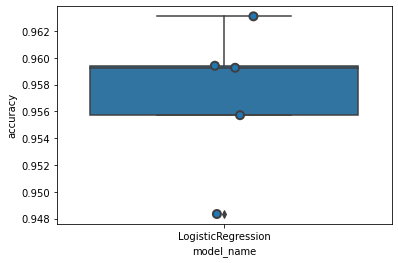

In [396]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

# models = [
#     RandomForestClassifier(n_estimators=200, max_depth=3, random_state=0),
#     LinearSVC(),
#     MultinomialNB(),
#     LogisticRegression(random_state=0),
# ]
models = [
    LogisticRegression(random_state=0),
]
CV = 5
cv_df = pd.DataFrame(index=range(CV * len(models)))
entries = []

model = LogisticRegression()
model.fit(X_train_tfidf, y_train)
accuracies = cross_val_score(model, features, targets, scoring='accuracy', cv=CV)
print(model.coef_)


# for model in models:
#     model_name = model.__class__.__name__
#     accuracies = cross_val_score(model, features, targets, scoring='accuracy', cv=CV)
#     print(LogisticRegression.coef_)

    
for fold_idx, accuracy in enumerate(accuracies):
    entries.append((model_name, fold_idx, accuracy))
    
cv_df = pd.DataFrame(entries, columns=['model_name', 'fold_idx', 'accuracy'])

import seaborn as sns

sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, 
              size=8, jitter=True, edgecolor="gray", linewidth=2)
plt.show()

In [292]:
cv_df.groupby('model_name').accuracy.mean()

model_name
LogisticRegression    0.93353
Name: accuracy, dtype: float64

## PCA and Clustering 


In [273]:

    # Initializing and fitting k-means model
    kmeans = KMeans(n_clusters=6, n_jobs=-1)
    kmeans.fit(tfidf)

    # Returning most representative words for each cluster
    get_representative_jobs(df, kmeans)

    # Calculating model score for kmeans
    silhouette_score(tfidf, kmeans.labels_)
    kmeans.score(tfidf)
    
    #Visualizing k-means clusters with PCA graph
    kmeans_model = kmeans
    labels=kmeans_model.labels_.tolist()

    pca = PCA(n_components=2).fit(tfidf)
    datapoint = pca.transform(tfidf)


/home/aqeelali7/anaconda3/lib/python3.8/site-packages/sklearn/cluster/_kmeans.py:792: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  warnings.warn("'n_jobs' was deprecated in version 0.23 and will be"



Cluster Represnetations
physician
physician
physician
physician
physician

Cluster Represnetations
financial+analyst
financial+analyst
financial+analyst
chemical+engineer
physician

Cluster Represnetations
physician
chemical+engineer
physician
physician
chemical+engineer

Cluster Represnetations
data+scientist
data+scientist
data+scientist
data+scientist
data+scientist

Cluster Represnetations
chemical+engineer
physician
physician
chemical+engineer
physician

Cluster Represnetations
chemical+engineer
chemical+engineer
physician
physician
physician


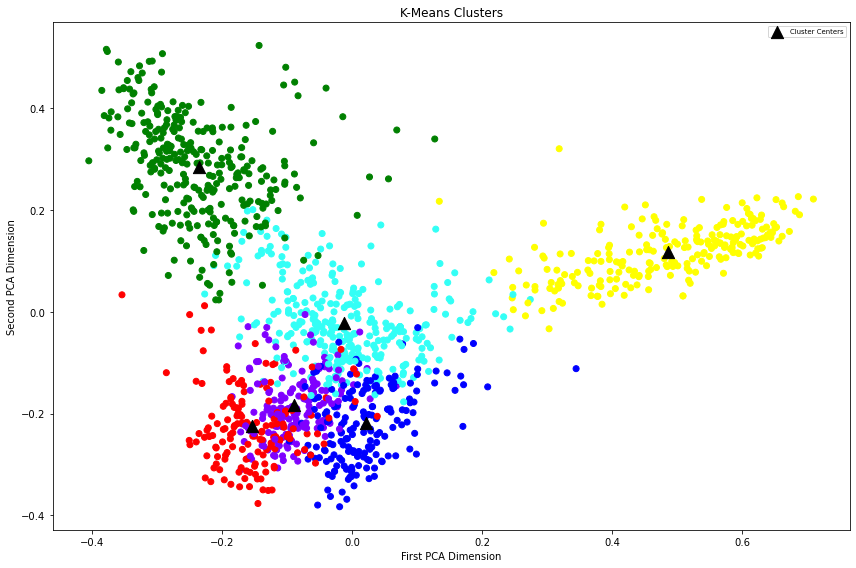

In [282]:
plt.figure(figsize=(12, 8))

label1 = ["#FFFF00", "#008000", "#0000FF", "#FF0000","#33fff6","#7F00FF"]
           
color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1], c=color)
centroids = kmeans_model.cluster_centers_
centroidpoint = pca.transform(centroids)
plt.scatter(centroidpoint[:,0], centroidpoint[:,1], marker='^', s=150, c="#000000", label='Cluster Centers')
plt.xlabel('First PCA Dimension')
plt.ylabel('Second PCA Dimension')
plt.title('K-Means Clusters')
plt.legend(fontsize='x-small')
#     plt.text(0.44,0.6, 'Blue: Mobile devs', fontsize=9)
#     plt.text(0.44, 0.5, 'Yellow: Data science', fontsize=9)
#     plt.text(0.44, 0.4, 'Green: Big data dev', fontsize=9)
#     plt.text(0.44, 0.4, 'Red: Big data dev', fontsize=9)

plt.tight_layout()
#     plt.savefig('../imgs/pca_kmeans_3_clusters.png');


Given training on job descriptions, the goal is that the model can classify into these clusters (with percentage fit/matching) with NEW inputs. 

PCA/Cosine Similarity with eigenvectors. Model tells us % similarity.

 - go back and look at how features fit into the clusters
 
Find HTML template


### Run model (some sort of linear model)
#### Find Feature significance 

## LDA for Feature Importance



## Cosine Similarity Matching

In [283]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
count_matrix = cv.fit_transform(cleaned_descriptions)

In [284]:
resume = "AQEEL ALI Aqeelali0312@gmail.com | (408) 718-0712 | www.linkedin.com/in/aqeelali786 EDUCATION: California Polytechnic University, San Luis Obispo, CA B.S. Business Administration – Financial Management Concentration Minor in Psychology ● Honors: Principal’s List (3.5+ GPA for three consecutive academic terms) - Fall 2019 ● Relevant Coursework: Financial Engineering in Risk Management, Computer Applications in Finance, Advanced Corporate Finance Chartered Financial Analyst Level Two Candidate Exam Date: Nov 2021 ● Pursuing CFA designation by acquiring a wide breadth of portfolio management skills. ● Level One Exam passed on June 2019. WORK EXPERIENCE: Middle Market Portfolio Analyst – Comerica Bank, San Jose, CA Jul 2019 to Present ● Analyze employer’s Middle Market business for the California region through industry, financial, macroeconomic data and other supporting credit information concerning an applicant's credit requests. ● Identify key business and financial risks that may impact the repayment prospects by the borrower. ● Expertise in Salesforce Data Management and CRM software systems utilized while underwriting to 8-figure commercial banking facilities ranging from $5M to $100M loans and facilities. aggregate exposure of bank assets. ● Prepare, review and assess the creditworthiness of commercial loan originations and renewals by evaluating tax returns, spreads of financial statements, historical trends, rent rolls, leases, projections, management performance, industry reports, cash flow models, capital structure and collateral analysis and other relevant data to analyze portfolio companies’ repayment capacity. ● Ensure the integrity of performance data for clientele and prospects and maintain ongoing relationships with thecustodial partners banks, vendors, and internal groups. ● Offer insights into customer financial needs, including opportunities identified using Line of Business-approved relationship expansion tools. Contribute personal insights related to a loan structure's effectiveness to mitigate risks, appropriate to prevailing competitive market environment and Bank risk tolerances. ● Prepared & presented nation-wide internal quarterly Company Q1 & Q2 2020 earnings reports and portfolio updates (within a team of four). ● Undertook special project initiative while fluidly adapting self-starter work ethic to a remote work environment during the initial rollout of Federal Treasury Payroll Protection Program and reviewed numerous applicants’ eligibility & fund usage during COVID-19 global pandemic. Venture Capital Analyst Intern - LDR Ventures, San Luis Obispo, CA Jan 2019 to Apr 2019 ● Analyzed investment opportunities up to $1.5M, prepared fundraising pitches to external stakeholders and prospective investors, and identified potential risks for early stage portfolio companies ● Assisted in building pricing models to help companies launch multiple new product lines and conduct stress tests under varying scenario analyses. ● Oversaw a personally proposed initiative for a portfolio company’s marketing campaign across universities in California. LEADERSHIP & OTHER RELEVANT EXPERIENCE Banking Valuations, Investment Banking Society San Luis Obispo, CA Jan 2019 to Feb 2019 ● Took an extracurricular course which covered the three main methods of company valuations ● Competed in a Goldman Sachs case competition against over 20 teams to create a pitch deck and presentation for a real case study. Recommended a company’s IPO by analyzing their financial position, creating a pro forma financial model, computing value with several valuation methodologies and examining IPO market conditions Member - MacIntalkers of Toastmasters International Apple Cupertino, CA Jul 2018 to Feb 2020 ● Delivered five public speeches under the “Dynamic Leadership” Pathways project. ● Developed effective communication skills on a weekly basis. " 
lyft_job_desc = "Financial Analyst, Strategy Finance at Lyft San Francisco, CA At Lyft, our mission is to improve people’s lives with the world’s best transportation. To do this, we start with our own community by creating an open, inclusive, and diverse organization.  Lyft is hiring a Financial Analyst for its Strategy Finance Team. The candidate in this position will provide financial and analytical support to drive strategic decisions for the company and help prepare financial management reporting. As a Financial Analyst, you will work directly with stakeholders across Finance in forecasting, planning and reporting key metrics to senior leadership.  Responsibilities: Help in analyzing & modeling forecast trends for total company financials Assist in the preparation and analysis of consolidated P&L for actuals and forecasts, help the FP&A team on deliverables, ongoing variance analysis, and ad hoc modeling Help lead the FP&A team through weekly and monthly forecasting Assist in the quarterly and annual strategic planning process Collaborate with Investor Relations by analyzing relevant financial information in preparation for the earnings call and investor presentations Team up with Corporate Development to create Board of Directors financials Partner with FP&A, Accounting, Treasury, Tax, and HR to forecast centralized expenses Drive monthly and quarterly close activities for FP&A and support consolidated management reporting Partner with Accounting to manage close timelines, process and reporting Manage creation of internal executive reporting documents including board, close and other management presentations and workbooks Support initiatives to create process efficiencies & improvements within FP&A Experience: BA/BS with 3+ years of experience in financial planning and analytics (FP&A) in a rigorous environment Corporate Finance, forecasting, or consolidations experience is a plus Detail-oriented and organized self-starter with a drive to dig into complex problems Advanced Excel skills. Experience building complex formulas and manipulating large data sets Ability to work in a fast-paced, team-based environment with minimal supervision Research, quantitative and analytical skills Comfortable navigating through financial statements Ability to organize and track overlapping tasks and assignments, with frequent priority changes Strong interpersonal and communication skills, with the ability to communicate and influence effectively across various departments Benefits: Great medical, dental, and vision insurance options Mental health benefits In addition to 12 observed holidays, salaried team members have unlimited paid time off, hourly team members have 15 days paid time off 401(k) plan to help save for your future 18 weeks of paid parental leave. Biological, adoptive, and foster parents are all eligible Pre-tax commuter benefits Lyft Pink - Lyft team members get an exclusive opportunity to test new benefits of our Ridership Program " 

In [285]:
resume_count_matrix = cv.fit_transform([resume,lyft_job_desc])

In [286]:
from sklearn.metrics.pairwise import cosine_similarity

In [287]:
print(cosine_similarity(resume_count_matrix))

[[1.         0.65583356]
 [0.65583356 1.        ]]


In [288]:
matchPercentage =  round(cosine_similarity(resume_count_matrix)[0][1]*100,2)

In [289]:
matchPercentage

65.58

In [290]:
6 job titles [  DS   |  FA |  CE ]
input text   [ %fit        |           |           ]


SyntaxError: invalid syntax (<ipython-input-290-38b7068e73a5>, line 1)

In [ ]:
FA_profile = "Finance" --> "financ"
IF name LIKE financ% 
